In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats
%matplotlib inline

In [32]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.drop(columns=['EmployeeCount', 'StandardHours', 'HourlyRate', 'DailyRate', 'MonthlyRate'], inplace=True)
ndf = df.copy()
print(df.keys())
print(df.shape)

#churn yes means that the customer no longer is a subscriber
#variables of interest
#cat: Department, OverTime
#cont: MonthlyIncome, PercentSalaryHike, JobLevel, JobInvolvement

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 30)


In [3]:
df.head()
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [4]:
#check to see any null data
print(np.count_nonzero(df.isnull().values))
print(df.isnull().any())
    
#check and get rid of duplicates
print(df[df.duplicated(keep=False)].shape)

0
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompa

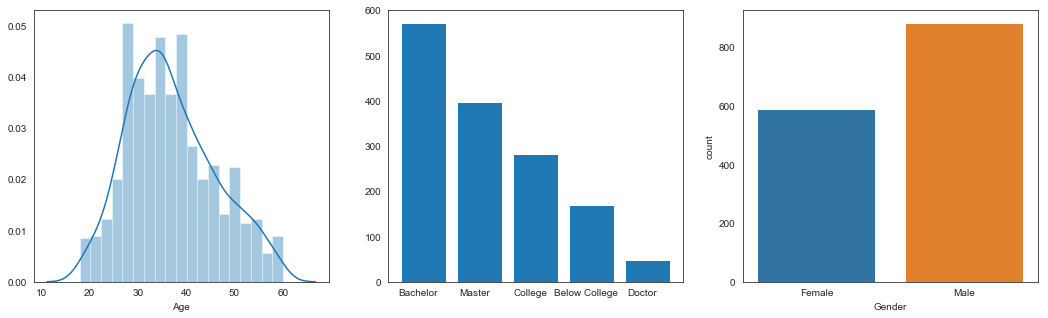

In [24]:
sns.set_style('white')
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.distplot(df.Age)

#creating a descending sort algorithm for education graph
plt.subplot(132)
replace = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
edu = ndf['Education'].replace(to_replace=replace)
counts = Counter(edu)
labels, values = zip(*counts.items())
desc_sort = np.argsort(values)[::-1]

labels = np.array(labels)[desc_sort]
values = np.array(values)[desc_sort]
indexes = np.arange(len(labels))
bar_width = 0.3
plt.bar(indexes, values, align='edge')
plt.xticks(indexes + bar_width, labels)

plt.subplot(133)
sns.countplot('Gender', data=df)

plt.show()

In [25]:
#turn attrition into numeric
ndf['Attrition'] = np.where((ndf['Attrition']=="Yes"), 1, 0)
ndf['OverTime'] = np.where((ndf['OverTime']=='Yes'), 1, 0)

Current attrition rate from data: 16.12%


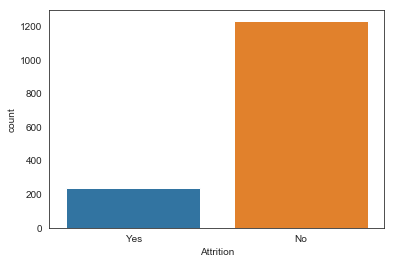

In [26]:
print("Current attrition rate from data: {0:.2f}%".format(ndf['Attrition'].mean()*100))
sns.countplot('Attrition', data=df)
plt.show()

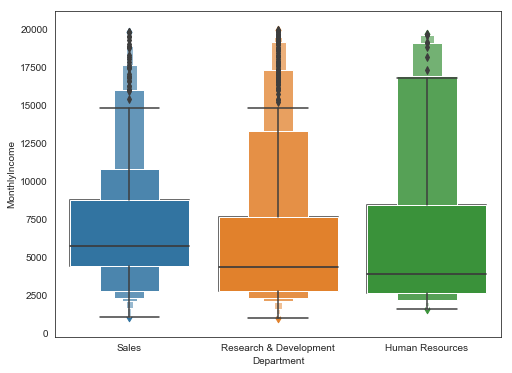

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
sns.boxenplot(x='Department', y='MonthlyIncome', data=df)

plt.show()
print(df.Department.value_counts())
#what percent of the sample are outliers

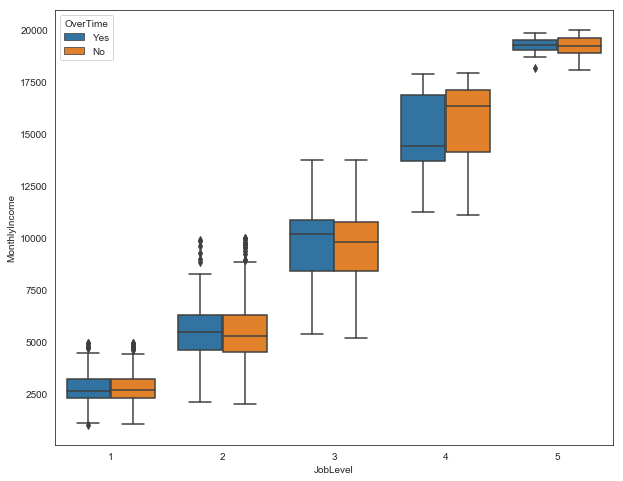

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x='JobLevel', y='MonthlyIncome', hue='OverTime', data=df)
plt.show()
#so even with overtime people seem to have similar income across increasing job levels(1-easy, 5-hard)
#might be why some people leave

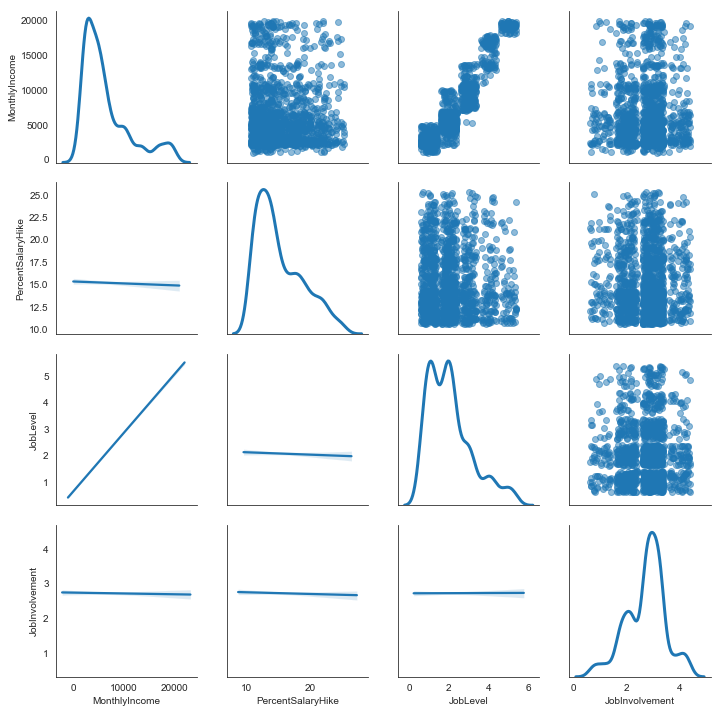

In [29]:
mat = ndf.loc[:,['Department', 'OverTime', 'MonthlyIncome', 'PercentSalaryHike', 'JobLevel', 'JobInvolvement']]
df_jittered = mat.loc[:, ['MonthlyIncome', 'PercentSalaryHike', 'JobLevel', 'JobInvolvement']]
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.4, .4, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

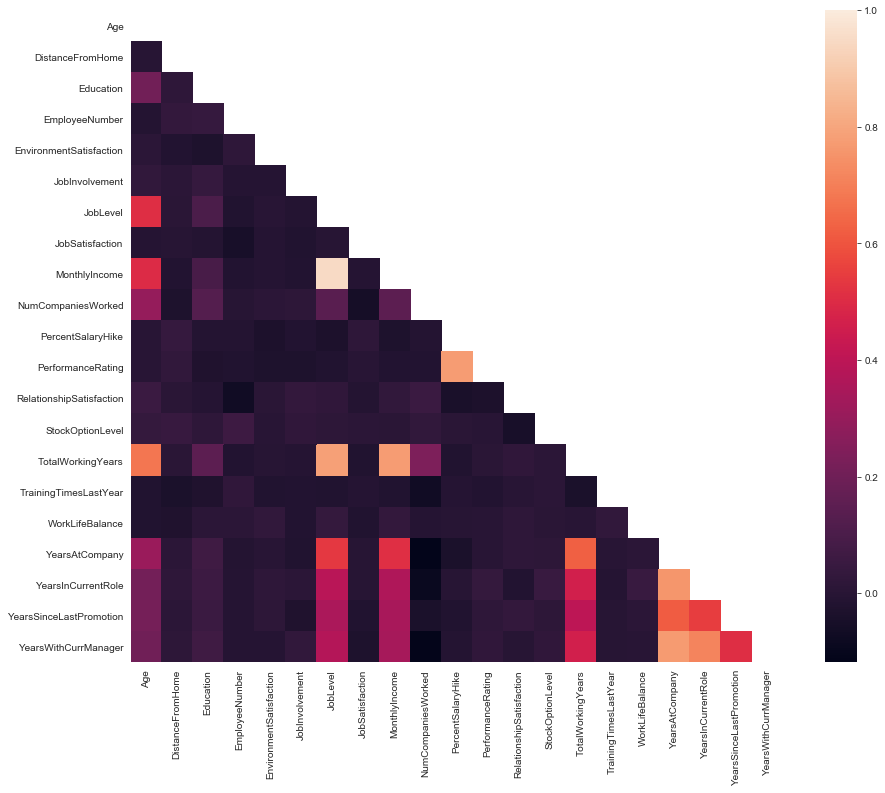

In [33]:
corrmat = ndf.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, mask=mask, vmax=1, square=True)
plt.show()


#joblevel,monthly income seem to be similar
# years at current role, years w current managerseems irrelevant
#means = df[['JobLevel','MonthlyIncome','PercentSalaryHike']].mean(axis=0)
#stds = df[['JobLevel','MonthlyIncome','PercentSalaryHike']].std(axis=0)
#features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
#plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
#plotdf['trust_fair_help'] = features['trust_fair_help'] 
#corrmat2 = plotdf.corr()
#corrmat2
#print(corrmat2)

In [30]:
#overtime seems like a plausable feature to look at further
features = pd.get_dummies(df['Department'])
features['YearlyIncome'] = df['MonthlyIncome'] * 12

In [35]:
print(ndf[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe())
#stability is defined as working with the same company for at least 3 years and being in the current role for 3 or more years
features['Stable_Employee'] = np.where(
    ((ndf.YearsAtCompany>=ndf.YearsInCurrentRole) & (ndf.YearsInCurrentRole>3) & (ndf.YearsWithCurrManager>3)), 1,0)

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1470.000000  
mean               4.123129  
std                3.568136  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  


In [49]:
features['low_experience'] = np.where((ndf.TotalWorkingYears<3) & (features.Stable_Employee!=1), 1, 0)

#evaluate how to define high performance by looking at distribution
ndf.PercentSalaryHike.value_counts()
features['high_performers'] = np.where((ndf.PerformanceRating>3) & (ndf.PercentSalaryHike>15), 1, 0)

features['Higher_education'] = np.where((ndf.Education!=1), 1, 0)
ndf.TotalWorkingYears.value_counts()
ndf.NumCompaniesWorked.mean()

2.6931972789115646

In [53]:
ndf.EnvironmentSatisfaction.value_counts()
features['Overtime_dissatisfied'] = np.where((ndf.OverTime==1) & (ndf.EnvironmentSatisfaction<2), 1, 0)
features['High_industry_experience'] = np.where((ndf.TotalWorkingYears>=20), 1, 0)
features['Poor_work_life_balance'] = np.where((ndf.RelationshipSatisfaction==1)&(ndf.WorkLifeBalance==1), 1, 0)
#those who get paid more than the mean and those whose job level is highe than average
features['Highly_rewarded_workers'] = np.where((ndf.MonthlyIncome>ndf.MonthlyIncome.mean()) &(ndf.JobLevel>2), 1, 0)

features['Job_Hopper'] = np.where((features.Stable_Employee!=1) & (ndf.NumCompaniesWorked>ndf.NumCompaniesWorked.mean()), 1, 0)

In [54]:
X = StandardScaler().fit_transform(features)
sklearn_pca = PCA(n_components=10)
feat_sklearn = sklearn_pca.fit_transform(X)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.22663526 0.16046894 0.12039366 0.09104434 0.08879165 0.08409557
 0.08178754 0.07448607 0.0311525  0.02969012]
